In [ ]:
import face_recognition
import cv2
import os

In [ ]:
known_encodings = []
known_names = []

known_dir = "known_faces"  

for file in os.listdir(known_dir):
    if file.endswith((".jpg", ".png", ".jpeg")):
        img_path = os.path.join(known_dir, file)
        image = face_recognition.load_image_file(img_path)
        encoding = face_recognition.face_encodings(image)[0]  # Take first face found
        known_encodings.append(encoding)
        known_names.append(os.path.splitext(file)[0])

print("Known faces loaded:", known_names)


✅ Known faces loaded: ['charles', 'trump']


In [ ]:
unknown_image = face_recognition.load_image_file("unlnown_faces/group.jpg")
unknown_image_rgb = cv2.cvtColor(unknown_image, cv2.COLOR_BGR2RGB)

face_locations = face_recognition.face_locations(unknown_image_rgb)
face_encodings = face_recognition.face_encodings(unknown_image_rgb, face_locations)


In [ ]:
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    matches = face_recognition.compare_faces(known_encodings, face_encoding, tolerance=0.5)
    name = "Unknown"

    
    if True in matches:
        first_match_index = matches.index(True)
        name = known_names[first_match_index]

    
    cv2.rectangle(unknown_image_rgb, (left, top), (right, bottom), (0, 255, 0), 2)
    cv2.putText(unknown_image_rgb, name, (left, top - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)


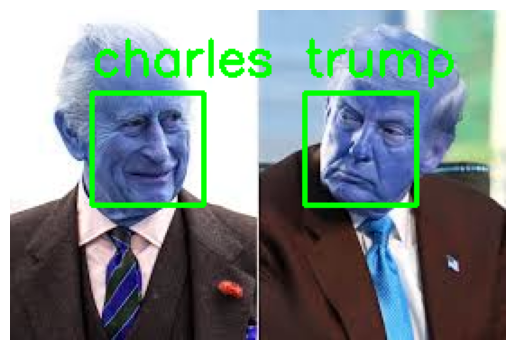

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(unknown_image_rgb)
plt.axis("off")
plt.show()
